In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle('../../Base de datos/Processed/nocategorical.pkl')
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,target
0,0.554222,1.0,0.0,0.000000,0.398189,0.000000,0.190514,0.774141,0.004995,0.666667,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,1
1,0.521013,0.5,0.0,NaN,0.299222,0.000649,0.000000,0.827157,0.000668,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,1
2,0.545612,1.0,0.0,0.000102,0.248790,0.000000,0.571429,0.851531,0.000604,0.000000,...,0.206293,0.022686,0.000562,0.50000,0.116689,0.566809,0.020597,0.020891,1.0,1
3,0.593774,0.5,0.0,0.000000,0.412052,0.001299,0.087886,0.559571,0.002227,0.333333,...,0.026009,0.074658,0.003375,1.00000,0.025595,0.097360,0.020597,0.002580,0.0,1
4,0.278900,0.0,0.0,0.000000,0.160199,0.009740,0.134400,0.841197,0.000700,0.833333,...,0.049540,0.064444,0.003375,0.85715,0.032973,0.131737,0.020597,0.002613,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472417,0.423788,0.0,0.0,0.000000,0.485636,0.018182,0.285714,0.792730,0.004645,0.333333,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,1
472418,0.539659,0.5,0.0,0.000105,0.158255,0.005844,0.114286,0.517002,0.002545,0.500000,...,0.112360,0.020824,0.004499,0.85000,0.042598,0.189578,0.020597,0.003336,1.0,1
472419,0.435566,0.5,0.0,0.000164,0.423629,0.003247,0.142857,0.801128,0.000859,0.666667,...,0.064070,0.030698,0.016873,0.92645,0.031424,0.202529,0.020597,0.004713,0.0,1
472420,0.395057,0.5,0.0,0.000000,0.340654,0.010390,0.285714,0.731666,0.000700,0.000000,...,0.039394,0.112085,0.000562,0.50000,0.040467,0.101130,0.112085,0.001517,1.0,1


# Quitamos valores NaN

In [3]:
# Encuentra las columnas que tienen al menos un valor negativo
negative_columns = df.columns[(df > 100).any()].tolist()

# Imprime las columnas con valores negativos
print("Columnas con valores negativos:", negative_columns)

# Número de columnas con valores negativos
num_negative_columns = len(negative_columns)
print(f"Número de columnas con valores negativos: {num_negative_columns}")

Columnas con valores negativos: []
Número de columnas con valores negativos: 0


In [4]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='constant', fill_value=-1)
df_dropped_all = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [5]:
nan_columns = df_dropped_all.columns[df_dropped_all.isna().any()].tolist()
print(f"Columnas con valores NaN: {nan_columns}")

Columnas con valores NaN: []


# Analisis de colinealidad

In [6]:
correlation_matrix = df_dropped_all.corr().abs()

In [7]:
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

In [8]:
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9)]
len(to_drop)

25

In [9]:
df_dropped = df_dropped_all.drop(df_dropped_all[to_drop], axis=1)

In [10]:
df_dropped

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_10,feature_13,...,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,target
0,0.554222,1.0,0.0,0.000000,0.398189,0.000000,0.190514,0.774141,0.666667,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
1,0.521013,0.5,0.0,-1.000000,0.299222,0.000649,0.000000,0.827157,0.000000,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
2,0.545612,1.0,0.0,0.000102,0.248790,0.000000,0.571429,0.851531,0.000000,0.0,...,0.206293,0.022686,0.000562,0.50000,0.116689,0.566809,0.020597,0.020891,1.0,1.0
3,0.593774,0.5,0.0,0.000000,0.412052,0.001299,0.087886,0.559571,0.333333,0.0,...,0.026009,0.074658,0.003375,1.00000,0.025595,0.097360,0.020597,0.002580,0.0,1.0
4,0.278900,0.0,0.0,0.000000,0.160199,0.009740,0.134400,0.841197,0.833333,0.0,...,0.049540,0.064444,0.003375,0.85715,0.032973,0.131737,0.020597,0.002613,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472417,0.423788,0.0,0.0,0.000000,0.485636,0.018182,0.285714,0.792730,0.333333,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
472418,0.539659,0.5,0.0,0.000105,0.158255,0.005844,0.114286,0.517002,0.500000,0.0,...,0.112360,0.020824,0.004499,0.85000,0.042598,0.189578,0.020597,0.003336,1.0,1.0
472419,0.435566,0.5,0.0,0.000164,0.423629,0.003247,0.142857,0.801128,0.666667,0.0,...,0.064070,0.030698,0.016873,0.92645,0.031424,0.202529,0.020597,0.004713,0.0,1.0
472420,0.395057,0.5,0.0,0.000000,0.340654,0.010390,0.285714,0.731666,0.000000,0.0,...,0.039394,0.112085,0.000562,0.50000,0.040467,0.101130,0.112085,0.001517,1.0,1.0


# Información Mutua

In [11]:
# Seleccionar todas las columnas excepto 'target' como X
X = df_dropped.drop('target', axis=1)

# Seleccionar la columna 'target' como y
y = df_dropped['target']

In [12]:
from sklearn.feature_selection import mutual_info_regression

# Calcula la información mutua
mi = mutual_info_regression(X, y)

# Asocia cada valor de MI con su columna correspondiente
mi_scores = pd.Series(mi, index=X.columns)

# Ordena los scores
mi_scores = mi_scores.sort_values(ascending=False)

# Muestra o guarda los scores
print(mi_scores)

feature_122    0.013517
feature_171    0.006144
feature_200    0.004411
feature_199    0.004277
feature_198    0.004023
                 ...   
feature_108    0.000000
feature_106    0.000000
feature_99     0.000000
feature_96     0.000000
feature_117    0.000000
Length: 193, dtype: float64


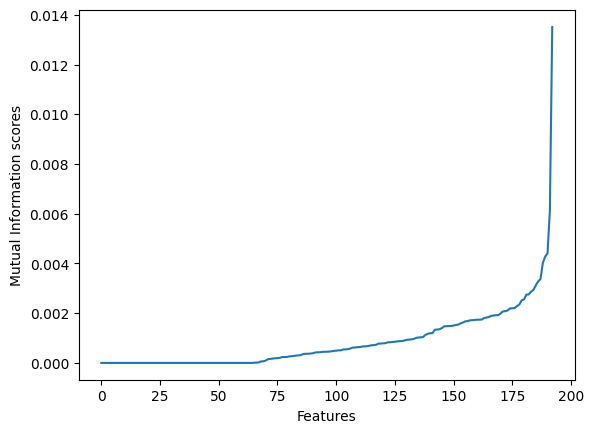

In [13]:
sorted_scores = np.sort(mi_scores)
plt.plot(sorted_scores)
plt.xlabel('Features')
plt.ylabel('Mutual Information scores')
plt.show()

# Factor de inflación de la varianza (VIF)

In [14]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calcula VIF para cada variable predictora
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

         feature        VIF
0      feature_1  23.636037
1      feature_2   8.582782
2      feature_3   7.084725
3      feature_4   2.180478
4      feature_5   8.666131
..           ...        ...
188  feature_214  10.634975
189  feature_215  25.463829
190  feature_216   4.804444
191  feature_217   1.538827
192  feature_218   2.977695

[193 rows x 2 columns]


In [15]:
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)
print(vif_data_sorted)

         feature          VIF
175  feature_200  4827.810196
177  feature_202  4455.012073
174  feature_199  4032.959146
180  feature_205  3032.133966
173  feature_198  1815.865099
..           ...          ...
118  feature_140     1.094238
100  feature_121     1.022919
95   feature_115     1.010688
9     feature_13     1.003699
126  feature_150     1.002686

[193 rows x 2 columns]


In [16]:
# Encuentra las características con VIF mayor a 10
features_to_drop = vif_data[vif_data['VIF'] > 10]['feature']

# Elimina esas características del DataFrame original X
X_reduced = X.drop(columns=features_to_drop)

In [17]:
X_reduced

,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_13,feature_14,feature_15,feature_16,...,feature_197,feature_201,feature_204,feature_207,feature_208,feature_211,feature_212,feature_216,feature_217,feature_218
0,1.0,0.0,0.000000,0.398189,0.000000,0.190514,0.0,0.001558,0.866242,0.1338,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,0.5,0.0,-1.000000,0.299222,0.000649,0.000000,0.0,0.000000,-1.000000,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
2,1.0,0.0,0.000102,0.248790,0.000000,0.571429,0.0,0.000000,-1.000000,0.0000,...,0.051724,0.054765,0.000114,0.022232,0.050545,0.022686,0.000562,0.020597,0.020891,1.0
3,0.5,0.0,0.000000,0.412052,0.001299,0.087886,0.0,0.000011,0.013514,0.0000,...,0.034483,0.042598,0.012136,0.013420,0.026187,0.074658,0.003375,0.020597,0.002580,0.0
4,0.0,0.0,0.000000,0.160199,0.009740,0.134400,0.0,0.000069,0.113208,0.0000,...,0.040230,0.041252,0.008640,0.004438,0.050889,0.064444,0.003375,0.020597,0.002613,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472417,0.0,0.0,0.000000,0.485636,0.018182,0.285714,0.0,0.000011,0.006849,0.0000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
472418,0.5,0.0,0.000105,0.158255,0.005844,0.114286,0.0,0.000653,0.712500,0.0000,...,0.022989,0.045631,0.007853,0.050161,0.115419,0.020824,0.004499,0.020597,0.003336,1.0
472419,0.5,0.0,0.000164,0.423629,0.003247,0.142857,0.0,0.000103,0.321429,0.2500,...,0.178161,0.035461,0.006282,0.003414,0.024191,0.030698,0.016873,0.020597,0.004713,0.0
472420,0.5,0.0,0.000000,0.340654,0.010390,0.285714,0.0,0.000000,-1.000000,0.0000,...,0.011494,0.058859,0.011526,0.182743,0.040467,0.112085,0.000562,0.112085,0.001517,1.0


In [18]:
# Calcula VIF para cada variable predictora
vif_data1 = pd.DataFrame()
vif_data1["feature"] = X_reduced.columns
vif_data1["VIF"] = [variance_inflation_factor(X_reduced.values, i) for i in range(len(X_reduced.columns))]

print(vif_data1)

         feature       VIF
0      feature_2  4.993220
1      feature_3  6.382306
2      feature_4  2.056543
3      feature_5  8.203818
4      feature_6  5.096622
..           ...       ...
140  feature_211  6.179811
141  feature_212  1.360101
142  feature_216  4.526709
143  feature_217  1.219025
144  feature_218  2.929420

[145 rows x 2 columns]


In [19]:
vif_data_sorted1 = vif_data1.sort_values(by="VIF", ascending=False)
print(vif_data_sorted1)

         feature       VIF
3      feature_5  8.203818
71   feature_124  8.039896
74   feature_127  7.678790
19    feature_41  7.638715
102  feature_160  7.092057
..           ...       ...
77   feature_130  1.080135
69   feature_121  1.020727
66   feature_115  1.010526
93   feature_150  1.002526
6     feature_13  1.002234

[145 rows x 2 columns]


In [20]:
# Encuentra las características con VIF mayor a 10
features_to_drop1 = vif_data1[vif_data1['VIF'] > 6]['feature']

# Elimina esas características del DataFrame original X
X_reduced1 = X_reduced.drop(columns=features_to_drop1)

In [21]:
X_reduced1

,feature_2,feature_4,feature_6,feature_7,feature_13,feature_14,feature_15,feature_16,feature_17,feature_20,...,feature_195,feature_197,feature_201,feature_204,feature_207,feature_208,feature_212,feature_216,feature_217,feature_218
0,1.0,0.000000,0.000000,0.190514,0.0,0.001558,0.866242,0.1338,3.0,0.008772,...,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
1,0.5,-1.000000,0.000649,0.000000,0.0,0.000000,-1.000000,0.0000,3.0,0.000000,...,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
2,1.0,0.000102,0.000000,0.571429,0.0,0.000000,-1.000000,0.0000,3.0,0.000000,...,1.0,0.051724,0.054765,0.000114,0.022232,0.050545,0.000562,0.020597,0.020891,1.0
3,0.5,0.000000,0.001299,0.087886,0.0,0.000011,0.013514,0.0000,2.0,0.035088,...,1.0,0.034483,0.042598,0.012136,0.013420,0.026187,0.003375,0.020597,0.002580,0.0
4,0.0,0.000000,0.009740,0.134400,0.0,0.000069,0.113208,0.0000,3.0,0.008772,...,1.0,0.040230,0.041252,0.008640,0.004438,0.050889,0.003375,0.020597,0.002613,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472417,0.0,0.000000,0.018182,0.285714,0.0,0.000011,0.006849,0.0000,3.0,0.052632,...,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
472418,0.5,0.000105,0.005844,0.114286,0.0,0.000653,0.712500,0.0000,3.0,0.000000,...,1.0,0.022989,0.045631,0.007853,0.050161,0.115419,0.004499,0.020597,0.003336,1.0
472419,0.5,0.000164,0.003247,0.142857,0.0,0.000103,0.321429,0.2500,3.0,0.000000,...,1.0,0.178161,0.035461,0.006282,0.003414,0.024191,0.016873,0.020597,0.004713,0.0
472420,0.5,0.000000,0.010390,0.285714,0.0,0.000000,-1.000000,0.0000,4.0,0.000000,...,2.0,0.011494,0.058859,0.011526,0.182743,0.040467,0.000562,0.112085,0.001517,1.0


In [22]:
df_totally_reduced = pd.concat([X_reduced1, y], axis=1)


In [23]:
df_totally_reduced

,feature_2,feature_4,feature_6,feature_7,feature_13,feature_14,feature_15,feature_16,feature_17,feature_20,...,feature_197,feature_201,feature_204,feature_207,feature_208,feature_212,feature_216,feature_217,feature_218,target
0,1.0,0.000000,0.000000,0.190514,0.0,0.001558,0.866242,0.1338,3.0,0.008772,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
1,0.5,-1.000000,0.000649,0.000000,0.0,0.000000,-1.000000,0.0000,3.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
2,1.0,0.000102,0.000000,0.571429,0.0,0.000000,-1.000000,0.0000,3.0,0.000000,...,0.051724,0.054765,0.000114,0.022232,0.050545,0.000562,0.020597,0.020891,1.0,1.0
3,0.5,0.000000,0.001299,0.087886,0.0,0.000011,0.013514,0.0000,2.0,0.035088,...,0.034483,0.042598,0.012136,0.013420,0.026187,0.003375,0.020597,0.002580,0.0,1.0
4,0.0,0.000000,0.009740,0.134400,0.0,0.000069,0.113208,0.0000,3.0,0.008772,...,0.040230,0.041252,0.008640,0.004438,0.050889,0.003375,0.020597,0.002613,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472417,0.0,0.000000,0.018182,0.285714,0.0,0.000011,0.006849,0.0000,3.0,0.052632,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0
472418,0.5,0.000105,0.005844,0.114286,0.0,0.000653,0.712500,0.0000,3.0,0.000000,...,0.022989,0.045631,0.007853,0.050161,0.115419,0.004499,0.020597,0.003336,1.0,1.0
472419,0.5,0.000164,0.003247,0.142857,0.0,0.000103,0.321429,0.2500,3.0,0.000000,...,0.178161,0.035461,0.006282,0.003414,0.024191,0.016873,0.020597,0.004713,0.0,1.0
472420,0.5,0.000000,0.010390,0.285714,0.0,0.000000,-1.000000,0.0000,4.0,0.000000,...,0.011494,0.058859,0.011526,0.182743,0.040467,0.000562,0.112085,0.001517,1.0,1.0


# Vemos cuales son las columnas totales que se quitaron

In [24]:
columns_removed = set(df.columns) - set(df_totally_reduced.columns)
columns_removed

{'feature_1',
 'feature_10',
 'feature_101',
 'feature_103',
 'feature_104',
 'feature_109',
 'feature_11',
 'feature_111',
 'feature_113',
 'feature_116',
 'feature_117',
 'feature_12',
 'feature_120',
 'feature_122',
 'feature_124',
 'feature_127',
 'feature_137',
 'feature_144',
 'feature_145',
 'feature_146',
 'feature_152',
 'feature_160',
 'feature_161',
 'feature_165',
 'feature_18',
 'feature_187',
 'feature_19',
 'feature_191',
 'feature_196',
 'feature_198',
 'feature_199',
 'feature_200',
 'feature_202',
 'feature_203',
 'feature_205',
 'feature_206',
 'feature_209',
 'feature_21',
 'feature_210',
 'feature_211',
 'feature_213',
 'feature_214',
 'feature_215',
 'feature_22',
 'feature_23',
 'feature_24',
 'feature_25',
 'feature_26',
 'feature_28',
 'feature_3',
 'feature_30',
 'feature_31',
 'feature_33',
 'feature_34',
 'feature_37',
 'feature_38',
 'feature_41',
 'feature_47',
 'feature_48',
 'feature_49',
 'feature_5',
 'feature_50',
 'feature_52',
 'feature_53',
 'featu

In [25]:
df_totally_reduced.to_pickle("../../Base de datos/Processed/train_clean.pkl")